In [1]:
%matplotlib inline

from sklearn import cluster
import numpy as np
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.tools as tls

# Taller Clasificación

Juan Navarro, <jsnavarroa@unal.edu.co>

## 1. Dado el siguiente conjunto de datos:

| A | B | C | Clase |
|:-:|:-:|:-:|:-----:|
| 0 | 0 | 1 | - |
| 1 | 0 | 1 | + |
| 0 | 1 | 0 | - |
| 1 | 0 | 0 | - |
| 1 | 0 | 1 | + |
| 0 | 0 | 1 | + |
| 1 | 1 | 0 | - |
| 0 | 0 | 0 | - |
| 0 | 1 | 0 | + |
| 1 | 1 | 1 | + |

**a) Estime la probabilidad condicional para P(A=1|+), P(B=1|+), P(C=1|+), P(A=1|−), P(B=1|−) y P(C=1|−)**
    
* $P(A=1|+) = 3/5 = 0.6 $
* $P(B=1|+) = 2/5 = 0.4 $
* $P(C=1|+) = 4/5 = 0.8 $
* $P(A=1|−) = 2/5 = 0.4 $
* $P(B=1|−) = 2/5 = 0.4 $
* $P(C=1|−) = 1/5 = 0.2 $
    
**b) Use las probabilidades calculadas para predecir la clase para el siguinte ejemplo $x=<1, 1, 1>$, usando “Naive Bayes”**

$$
\begin{equation*}
\begin{split}
P(+ | A=1, B=1, C=1) & = \frac{P(A=1, B=1, C=1 | + ) P(+)}{P(A=1, B=1, C=1)} \\
 & = \frac{P(A=1|+)P(B=1|+)P(C=1|+)P(+)}{P(A=1)P(B=1)P(C=1)} \\
 & = \frac{0.6 * 0.4 * 0.8 * 0.5}{0.5 * 0.4 * 0.5} = 0.96
\end{split}
\end{equation*}
$$
$$ P(- | A=1, B=1, C=1) = 1 - P(+ | A=1, B=1, C=1) = 0.04 $$
*La clase a la que pertenece el ejemplo es "+"*

**c) Compare P(A=1), P(B=1), y P(A=1,B=1). ¿Existe relación entre A y B? explique.**

* $P(A=1) = 0.5 $
* $P(B=1) = 0.4 $
* $\begin{equation*}
\begin{split}
P(A=1,B=1) & = P(A=1 | B=1) P(B=1) = 0.5 * 0.4 = 0.2 \\
 & = P(B=1 | A=1) P(A=1) = 0.4 * 0.5 = 0.2 \\
 & = P(B=1) P(A=1) = 0.4 * 0.5 = 0.2 \\
\end{split}
\end{equation*}$

*No. Cuando las variables A y B toman los valores 1 y 1 se comportan como independientes.*

**d) Compare P(A=1), P(B=0), y P(A=1,B=0). ¿Existe relación entre A y B? explique.**

* $P(A=1) = 0.5 $
* $P(B=0) = 0.6 $
* $\begin{equation*}
\begin{split}
P(A=1,B=0) & = P(A=1 | B=0) P(B=0) = 0.5 * 0.6 = 0.3\\
 & = P(B=1 | A=1) P(A=1) = 0.6 * 0.5 = 0.3 \\
\end{split}
\end{equation*}$

*No. Cuando las variables A y B toman los valores 1 y 0 se comportan como independientes.*

**e) Compare P (A = 1, B = 1|clase = +) con P (A = 1|clase = +) y P (B = 1|clase = +). ¿Son las variables condicionalmente independientes dada la clase?**

* $P(B = 1|clase = +) = 0.4 $
* $P(A = 1|clase = +) = 0.6 $
* $\begin{equation*}
\begin{split}
P (A = 1, B = 1|clase = +) & = P(A = 1 |B = 1, clase = +) * P(B = 1, clase = +) \\
 & = (1/2)*(2/10) = 0.1 \\
\end{split}
\end{equation*}$

*No son condicionalmente independientes dada la clase.*

## 2. Dado el siguiente conjunto de datos que describe 6 sesiones de usuarios visitando un sitio web con 4 URLs:

| URL1 | URL2 | URL3 | URL4:clase |
|:----:|:----:|:----:|:----------:|
| si   | si   | si   | si         |
| si   | si   | no   | no         |
| si   | no   | no   | no         |
| si   | no   | si   | si         |
| no   | si   | no   | no         |
| no   | si   | si   | no         |

**a) Construir un árbol de decisión para predecir si un usuario visita o no la URL4 (tratada como
la clase). Usar el criterio de información Gain para seleccionar los nodos. Colocar los detalles
de los calculos de la entropía y Gain por cada atributo y por cada uno de los subconjuntos
que se vayan generando. Ir dibujando el arbol a mediada que se va particionando. Explicar
cual nodo es raiz y por que.**

&nbsp;&nbsp; **1) Dibujar el árbol de decisión completo (los nodos hojas deben indicar la clase)**

- *(El árbol es el último mostrado en el procedimiento)*

&nbsp;&nbsp; **2) De acuerdo al árbol de decisión ¿cuales URLs no son relevantes en predecir si un usuario visitará la URL4?**

- *La URL 2 es la única irrelevante para predecir si un usuario visitará la URL 4.*

&nbsp;&nbsp; **3) Derivar las reglas de decisión usando el árbol de decisión.**

- *IF URL3=yes & URL1=yes, THEN URL4=yes*
- *IF URL3=yes & URL1=no, THEN URL4=no*
- *IF URL3=no, THEN URL4=no*

&nbsp;&nbsp; **4) Usar el árbol de decisión para predecir si la URL4 será visitada por el siguiente patrón nuevo: (URL1 = no, URL2 = no , URL3 = yes )**

- *Según el árbol, este patrón no visitará la URL 4.*

,URL 1,URL 2,URL 3,URL 4 : clase,_,Entropy: E(S),__,Attribute,Value,Count,Positive,Negative,Entropy,Info Gain
0,Si,Si,Si,Si,,0.918296,,URL 1,Yes,4,2,2,1.000000,0.251629
1,Si,Si,No,No,,,,,No,2,0,2,0.000000,
2,Si,No,No,No,,,,URL 2,Yes,4,1,3,0.811278,0.0441104
3,Si,No,Si,Si,,,,,No,2,1,1,1.000000,
4,No,Si,No,No,,,,URL 3,Yes,3,2,1,0.918296,0.459148
5,No,Si,Si,No,,,,,No,3,0,3,0.000000,


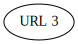

,URL 1,URL 2,URL 3,URL 4 : clase,_,Entropy: E(S),__,Attribute,Value,Count,Positive,Negative,Entropy,Info Gain
0,Si,Si,Si,Si,,0.820802,,URL 1,Yes,2,2,0,0,0.820802
1,Si,No,Si,Si,,,,,No,1,0,1,0,
2,No,Si,Si,No,,,,URL 2,Yes,2,1,1,1,0.154135
3,,,,,,,,,No,1,1,0,0,


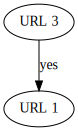

,URL 1,URL 2,URL 3,URL 4 : clase,_,Entropy: E(S),__
0,Si,Si,No,No,,0,
1,Si,No,No,No,,,
2,No,Si,No,No,,,


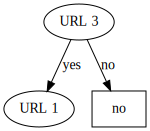

,URL 1,URL 2,URL 3,URL 4 : clase,_,Entropy: E(S),__
0,Si,Si,Si,Si,,0,
1,Si,No,Si,Si,,,


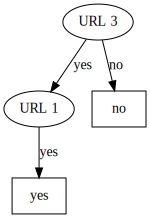

,URL 1,URL 2,URL 3,URL 4 : clase,_,Entropy: E(S),__
0,No,Si,Si,No,,0,


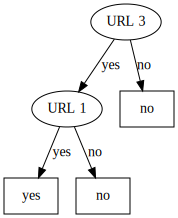

In [1]:
import graphviz  # conda install python-graphviz
import pandas as pd
from IPython.display import display, HTML

info_gain = pd.read_excel("Information Gain.xlsx", sheet_name=None)

# Create graph
t = graphviz.Digraph('Tree')

# Root URL 3
display(HTML('<h3>Root</h3>'))
display(info_gain['root'].fillna(""))
t.node('URL 3')
display(t)

# URL 3 = yes
display(HTML('<h3>URL 3 = yes</h3>'))
display(info_gain['u3 = yes'].fillna(""))
t.node('URL 1')
t.edge('URL 3', 'URL 1', label='yes')
display(t)

# URL 3 = no 
display(HTML('<h3>URL 3 = no </h3>'))
display(info_gain['u3 = no'].fillna(""))
t.node('r1', 'no', shape='box')
t.edge('URL 3', 'r1', label='no')
display(t)

# URL 3 = yes and URL 1 = yes
display(HTML('<h3>URL 3 = yes and URL 1 = yes</h3>'))
display(info_gain['u3 = yes y u1 = yes'].fillna(""))
t.node('r2', 'yes', shape='box')
t.edge('URL 1', 'r2', label='yes')
display(t)

# URL 3 = yes and URL 1 = no
display(HTML('<h3>URL 3 = yes and URL 1 = no</h3>'))
display(info_gain['u3 = yes y u1 = no'].fillna(""))
t.node('r3', 'no', shape='box')
t.edge('URL 1', 'r3', label='no')
display(t)

b) Si el conjunto de prueba (test) es:

| URL1 | URL2 | URL3 | URL4:clase |
|:----:|:----:|:----:|:----------:|
| si   | no   | no   | no         |
| si   | si   | si   | si         |
| no   | si   | no   | si         |
| no   | no   | si   | no         |
| no   | si   | si   | si         |

Calcular:
    
&nbsp;&nbsp; **1) Matriz de confusión**

|        |     | Predicted |    |
|:------:|:---:|:---------:|:--:|
|          |     |    Yes    | No |
|**Actual**| Yes |     1     |  2 |
|          |  No |     0     |  2 |

&nbsp;&nbsp; **2) Rata de detección:** *3/5 = 0.6*

&nbsp;&nbsp; **3) Falsa alarma:** *0*

&nbsp;&nbsp; **4) Precisión:** *1/1 = 1*

&nbsp;&nbsp; **5) Recall:** *1/3 = 0.33* 

&nbsp;&nbsp; **6) F1. La ecuacuón es $F1 = \frac{2}{\frac{1}{r} + \frac{1}{p}}$, r es recall, y p es precision.** *F1=0.5*